<a href="https://colab.research.google.com/github/MengOonLee/BertelsmannAITrack/blob/Lesson05/LoadingImageData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Clear previous directory
!rm -rf ./deep-learning-v2-pytorch

# Clone the repo.
!git clone https://github.com/udacity/deep-learning-v2-pytorch.git

# Change the working directory to the repo root.
%cd ./deep-learning-v2-pytorch/intro-to-pytorch

# Add the repo root to the Python path.
import sys, os
sys.path.append(os.getcwd())

Cloning into 'deep-learning-v2-pytorch'...
remote: Enumerating objects: 1078, done.
remote: Total 1078 (delta 0), reused 0 (delta 0), pack-reused 1078
Receiving objects: 100% (1078/1078), 137.71 MiB | 30.85 MiB/s, done.
Resolving deltas: 100% (489/489), done.
Checking out files: 100% (270/270), done.
/content/deep-learning-v2-pytorch/intro-to-pytorch


In [2]:
# Download the dataset of cat and dog photos
!wget -q -O Cat_Dog_data.zip https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip && unzip Cat_Dog_data.zip && rm -rf Cat_Dog_data.zip

Archive:  Cat_Dog_data.zip
   creating: Cat_Dog_data/
  inflating: Cat_Dog_data/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/Cat_Dog_data/
  inflating: __MACOSX/Cat_Dog_data/._.DS_Store  
   creating: Cat_Dog_data/test/
   creating: Cat_Dog_data/test/cat/
  inflating: Cat_Dog_data/test/cat/cat.7660.jpg  
   creating: __MACOSX/Cat_Dog_data/test/
   creating: __MACOSX/Cat_Dog_data/test/cat/
  inflating: __MACOSX/Cat_Dog_data/test/cat/._cat.7660.jpg  
  inflating: Cat_Dog_data/test/cat/cat.1211.jpg  
  inflating: __MACOSX/Cat_Dog_data/test/cat/._cat.1211.jpg  
  inflating: Cat_Dog_data/test/cat/cat.1563.jpg  
  inflating: __MACOSX/Cat_Dog_data/test/cat/._cat.1563.jpg  
  inflating: Cat_Dog_data/test/cat/cat.1205.jpg  
  inflating: __MACOSX/Cat_Dog_data/test/cat/._cat.1205.jpg  
  inflating: Cat_Dog_data/test/cat/cat.7884.jpg  
  inflating: __MACOSX/Cat_Dog_data/test/cat/._cat.7884.jpg  
  inflating: Cat_Dog_data/test/cat/cat.6542.jpg  
  inflating: __MACOSX/Cat_Dog_data/test/c

In [0]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import helper

In [0]:
data_dir = "Cat_Dog_data/train"

# Define a transform
transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])

# Load the data
dataset = datasets.ImageFolder(data_dir, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

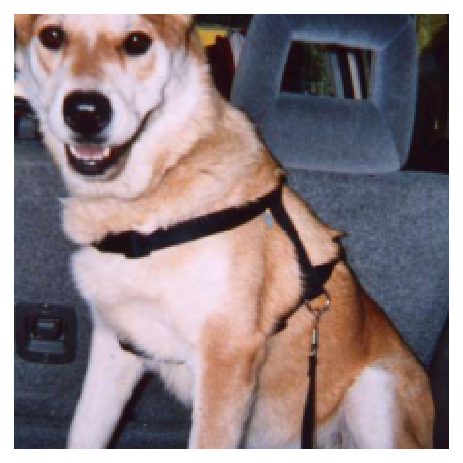

In [5]:
# Run this to test data loader
images, labels = next(iter(dataloader))
helper.imshow(images[0], normalize=False)

In [0]:
data_dir = "Cat_Dog_data"

# Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor()])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor()])

# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + "/train", transform=train_transforms)
trainloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)

test_data = datasets.ImageFolder(data_dir + "/test", transform=test_transforms)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=True)

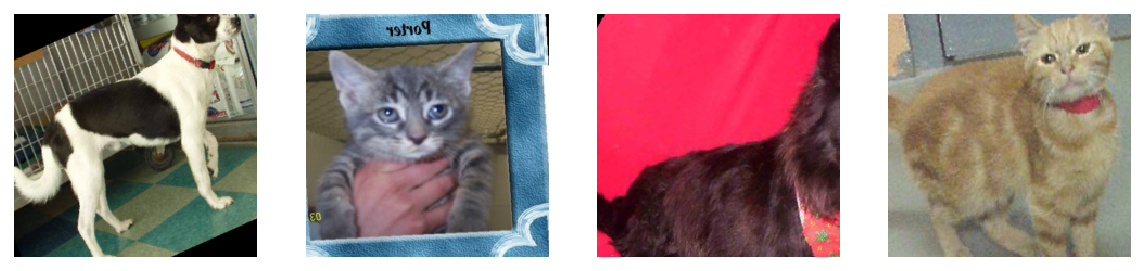

In [8]:
# Change this to the trainloader or testloader
data_iter = iter(trainloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
  ax = axes[ii]
  helper.imshow(images[ii], ax=ax, normalize=False)